In [120]:
import glob
import os
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle
import warnings
warnings.filterwarnings("ignore")
import cv2

In [121]:
path = "myData"

myList = os.listdir(path)
noOfClasses = len(myList)

print("Label(sınıf) Sayısı", noOfClasses)

Label(sınıf) Sayısı 10


In [122]:
images = []
classNo = []

for i in range(noOfClasses):
    myImageList = os.listdir(path + "\\"+str(i))
    for j in myImageList:
        img = cv2.imread(path + "\\"+str(i)+"\\"+j)
        img = cv2.resize(img,(32,32))
        images.append(img)
        classNo.append(i)
        
print(len(images))
print(len(classNo))

10160
10160


In [123]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)

(10160, 32, 32, 3)


In [124]:
#Veriyi Ayırma
x_train, x_test, y_train, y_test = train_test_split(images,classNo,test_size = 0.5, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size = 0.2, random_state = 42)

print(images.shape)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(10160, 32, 32, 3)
(4064, 32, 32, 3)
(5080, 32, 32, 3)
(1016, 32, 32, 3)


Text(0.5, 1.0, 'y_validation')

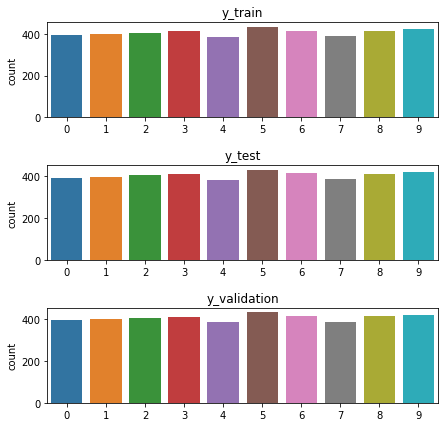

In [125]:
fig, axes = plt.subplots(3,1,figsize=(7,7))
fig.subplots_adjust(hspace = 0.5)
sns.countplot(y_train,ax=axes[0])
axes[0].set_title("y_train")

sns.countplot(y_train,ax=axes[1])
axes[1].set_title("y_test")

sns.countplot(y_train,ax=axes[2])
axes[2].set_title("y_validation")



In [126]:
# Preprocess

def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    
    return img

x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess,x_test)))
x_validation = np.array(list(map(preProcess,x_validation)))
x_train = x_train.reshape(-1,32,32,1)
print(x_train.shape)
x_test = x_test.reshape(-1,32,32,1)
x_validation = x_validation.reshape(-1,32,32,1)

(4064, 32, 32, 1)


In [127]:
#data generate
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range= 0.1,
                            rotation_range= 10)

dataGen.fit(x_train)

y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

model = Sequential()
model.add(Conv2D(input_shape = (32,32,1), filters = 8, kernel_size = (5,5),activation = "relu", padding = "same" ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 8, kernel_size = (3,3),activation = "relu", padding = "same" ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = noOfClasses, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])

batch_size = 250

hist = model.fit_generator(dataGen.flow(x_train, y_train, batch_size = batch_size),
                                      validation_data = (x_validation, y_validation),
                                      epochs = 15, steps_per_epoch = x_train.shape[0]//batch_size, shuffle = 1)




Epoch 1/15
16/16 [==============================] - 3s 120ms/step - loss: 2.2426 - accuracy: 0.1762 - val_loss: 1.9895 - val_accuracy: 0.5965
Epoch 2/15
16/16 [==============================] - 2s 100ms/step - loss: 1.8351 - accuracy: 0.4675 - val_loss: 1.0676 - val_accuracy: 0.8494
Epoch 3/15
16/16 [==============================] - 2s 102ms/step - loss: 1.2501 - accuracy: 0.6017 - val_loss: 0.5511 - val_accuracy: 0.8386
Epoch 4/15
16/16 [==============================] - 2s 135ms/step - loss: 0.9131 - accuracy: 0.7079 - val_loss: 0.3133 - val_accuracy: 0.9232
Epoch 5/15
16/16 [==============================] - 2s 108ms/step - loss: 0.7066 - accuracy: 0.7779 - val_loss: 0.2684 - val_accuracy: 0.9252
Epoch 6/15
16/16 [==============================] - 2s 105ms/step - loss: 0.6369 - accuracy: 0.7965 - val_loss: 0.2148 - val_accuracy: 0.9419
Epoch 7/15
16/16 [==============================] - 2s 110ms/step - loss: 0.5260 - accuracy: 0.8401 - val_loss: 0.1963 - val_accuracy: 0.9409
Epoch 

In [128]:
model.save("Model_Folder1/")
model.save_weights("Model_Folder1/")


INFO:tensorflow:Assets written to: Model_Folder1/assets
